In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
path=r'/content/gdrive/My Drive/normal_gei'

In [0]:
#path=r'/content/gdrive/My Drive/Fliped_Shifted_alngd_with_more_folders'

import os

t=os.listdir(path)
t.sort()

In [4]:
t

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035']

In [5]:
# import cv2
# import numpy as np
# arr=[]
# labels=[]
# gei=[]
# x=0
# for i in t:
#   x=x+1
#   d_path=os.path.join(path,i)
#   d_paths=os.listdir(d_path)
#   print(i)
#   temp_gei=[]
#   for d in d_paths:
#     temp=np.zeros((200,200))
#     folder_path=os.path.join(d_path,d)
#     imgs=os.listdir(folder_path)
#     for img in imgs:
#       im=cv2.imread(os.path.join(folder_path,img))
#       #cv2_imshow(im)
#       im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#       #print(im.shape)
#       temp=temp+im
#     arr.append(temp/len(imgs))
#     labels.append(x)
#     temp_gei.append(temp/len(imgs))
#   gei.append(np.asarray(temp_gei))
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
arr=[]
labels=[]
gei=[]
x=0
for i in t:
  x=x+1
  d_path=os.path.join(path,i)
  d_paths=os.listdir(d_path)
  #print(d_paths)
  for d in range(0,len(d_paths),2):
    #  temp=np.zeros((200,200))
    folder_path=os.path.join(d_path,d_paths[d])
    #  imgs=os.listdir(folder_path)
    #print(d_paths[d])
    im=cv2.imread(folder_path)
    #cv2_imshow(im)
    im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    labels.append(x)
    gei.append(im)
    print(i)

001
001
002
002
003
003
004
004
005
005
006
006
007
007
008
008
009
009
010
010
011
011
012
012
013
013
014
014
015
015
016
016
017
017
018
018
019
019
020
020
021
021
022
022
023
023
024
024
025
025
026
026
027
027
028
028
029
029
030
030
031
031
032
032
033
033
034
034
035
035


In [0]:
#d_path[d]

In [0]:
gei=np.asarray(gei)
arr=np.asarray(arr)

In [8]:
#gei.shape
gei.shape

(70, 224, 224)

In [0]:
#im=cv2.cvtColor(gei[0][0], cv2.COLOR_BGR2GRAY)

In [0]:
labels=np.asarray(labels)

In [0]:
from google.colab.patches import cv2_imshow
#cv2_imshow(cv2.cvtColor(arr[0]*255, cv2.COLOR_BGR2GRAY))

In [0]:
train=[]
ytrain=[]
for i in range(70):
  #temp=cv2.cvtColor(arr[i]*255, cv2.COLOR_BGR2GRAY)
  train.append(cv2.resize(gei[i],(128,128)))
  ytrain.append(labels[i])
train=np.asarray(train)
ytrain=np.asarray(ytrain)

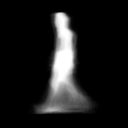

In [13]:
cv2_imshow(train[1])

In [14]:
train.shape

(70, 128, 128)

In [15]:
#train.shape
train_=[]
for i in range(len(train)):
  train_.append(train[i].flatten())
train_=np.asarray(train_)
train_.shape

(70, 16384)

In [0]:
import random
#combined = list(zip(train_, ytrain))
##random.shuffle(combined)

#train_[:], ytrain[:] = zip(*combined)
#s=np.arange(636)
s=np.arange(70)
np.random.shuffle(s)
train_=train_[s]
ytrain=ytrain[s]

In [0]:
train_=np.squeeze(train_)
ytrain=np.squeeze(ytrain)

In [40]:
train_.shape

(70, 16384)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
X_trans = pca.fit_transform(train_)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val , y_train, y_val = train_test_split(X_trans, ytrain, test_size = 0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


alg = RandomForestClassifier(n_estimators=800,criterion='entropy')

In [21]:
alg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_train = alg.predict(X_train)
y_pred_val   = alg.predict(X_val)

In [23]:
from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Val Accuracy:",metrics.accuracy_score(y_val, y_pred_val))

Train Accuracy: 1.0
Val Accuracy: 0.7857142857142857


In [24]:
y_train

array([33, 31, 34,  4, 15, 17,  1, 28, 29, 31, 27, 14, 12,  5, 26, 25, 22,
       13,  6,  6, 21, 27, 30, 24,  3, 11, 29, 23, 20,  5, 13,  7,  9,  8,
        9, 32, 11, 28, 12, 16,  7, 35, 35, 20, 34, 30, 33,  2, 25,  4, 10,
        8,  3, 18, 24, 14])

In [0]:
pathd11='/content/gdrive/My Drive/Results_GAIT/new_res_d4_2.mat'
pathd12='/content/gdrive/My Drive/Results_GAIT/new_res_d4_1.mat'
# pathd21='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d2_1.mat'
# pathd22='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d2_2.mat'
# pathd31='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d3_1.mat'
# pathd32='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d3_2.mat'
# pathd41='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d4_1.mat'
# pathd42='/content/gdrive/My Drive/Results_GAIT/frame_prediction_models/model_4/d4_2.mat'

In [0]:
from scipy.io import loadmat
d11=loadmat(pathd11)
d12=loadmat(pathd12)
# d21=loadmat(pathd21)
# d22=loadmat(pathd22)
# d31=loadmat(pathd31)
# d32=loadmat(pathd32)
# d41=loadmat(pathd41)
# d42=loadmat(pathd42)

In [0]:
#cv2_imshow(d11['003']*255)

In [0]:
l=['002', '007', '001', '003', '006', '004', '008', '010', '009', '005', '011', '020', '015', '019', '017', '013', '014', '016', '012', '018', '024', '025', '021', '028', '026', '027', '030', '022', '023', '029', '031', '034', '035', '033', '032']

In [0]:
test=[]
y=[]
for i in l:
  #temp=np.zeros((256,256,1))
  #for j in range(len(d42[i])):
    #temp=temp+d42[i][j]
  #temp=temp/len(d42[i])
  test.append(d11[i])
  y.append(int(i))

In [0]:
test=np.asarray(test)
y=np.asarray(y)

In [92]:
test.shape
#y.shape

(35, 256, 256, 3)

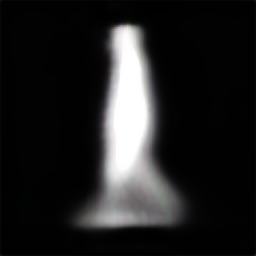

In [93]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.squeeze(test[0])*255)

In [0]:
test=np.squeeze(test)*255

In [0]:
test_=[]
for i in range(len(test)):
  test_.append(cv2.cvtColor(cv2.resize(test[i],(128,128)), cv2.COLOR_BGR2GRAY))

In [0]:
#test_.shape

In [0]:
test_=np.asarray(test_)

In [0]:
test__=[]
for i in range(35):
  test__.append(test_[i].flatten())
test__=np.asarray(test__)

In [99]:
test__.shape

(35, 16384)

In [100]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
ytest=pca.transform(test__)

In [102]:
ytest.shape

(35, 34)

In [103]:
metrics.accuracy_score(y, alg.predict(ytest))

0.34285714285714286

In [0]:
prob=alg.predict_proba(ytest)

In [0]:
ans=[]
for i in range(35):
  ans.append(np.argmax(prob[i]))
ans=np.asarray(ans)

In [106]:
ans

array([22,  6,  2,  6, 31,  3, 23,  6, 25,  6, 19, 13, 14, 15,  6, 23,  3,
        6, 11,  2,  6, 23, 19,  5, 25, 25, 28,  6,  2, 27, 29, 32,  4, 31,
        6])

In [0]:
a=0
for i in range(34):
  sort=np.argsort(prob[i])
  #print(sort[105]==i,sort[105], i)
  equal=[j for j in range(34) if prob[i][j] == prob[i][np.argmax(prob[i])]]
  
     ####Rank2##
  second_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-2]
  for k in range(len(prob[i])):
    if prob[i][k] == second_highest_element:
      equal.append(k)

   ####Rank3##
  third_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-3]
  for k in range(len(prob[i])):
    if prob[i][k] == third_highest_element:
      equal.append(k)
 ####Rank4##
  fourth_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-4]
  for k in range(len(prob[i])):
    if prob[i][k] == fourth_highest_element:
      equal.append(k)


      
  equal=np.asarray(equal)
  
  for j in range(len(equal)):
    if y[i]-1==equal[j]:
      a=a+1


In [116]:
a/35

0.37142857142857144

In [0]:
y

array([ 2,  7,  1,  3,  6,  4,  8, 10,  9,  5, 11, 20, 15, 19, 17, 13, 14,
       16, 12, 18, 24, 25, 21, 28, 26, 27, 30, 22, 23, 29, 31, 34, 35, 33,
       32])

In [0]:
ans

array([ 1,  6,  0,  2,  5,  3,  7,  9,  8,  4, 10, 19, 14, 18, 16, 12, 13,
       15, 11, 17, 23, 24, 20, 27, 25, 26, 29, 21, 22, 28, 30, 33, 34, 32,
       31])